# Text Section 5.7
## Superposition and Time Dependence of the Infinite Square Well
In example 5.5, we are given a wave function of
\begin{equation}
\psi(x, 0)=A\left[\left(\frac{x}{L}\right)^3-\frac{11}{7}\left(\frac{x}{L}\right)^2+\frac{4}{7}\left(\frac{x}{L}\right)\right]
\end{equation}
Let's normalize it (find $A$).

In [0]:
import numpy as np
import sympy as sym
from sympy.plotting import plot
from sympy import init_printing
import matplotlib.pyplot as plt
init_printing(use_latex='matplotlib')
#init_printing(use_latex=False)
import matplotlib
%matplotlib inline
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (10, 7.5),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)
plt.style.use('ggplot')

We'll use Sympy to do the symbolic python calculations. We need to solve the integral
\begin{equation} 
\begin{split}
\left<\psi|\psi\right> & = \int_{-\infty}^{\infty}\psi^*~\psi~dx=1
\\
\int_{-\infty}^{\infty}\psi^*~\psi~dx & = \int_{0}^{L}|A|^2\left[\left(\frac{x}{L}\right)^3-\frac{11}{7}\left(\frac{x}{L}\right)^2+\frac{4}{7}\left(\frac{x}{L}\right)\right]^2~dx
\end{split}
\end{equation}
First, define the symbols and the wavefunction.

In [0]:
A, x, L = sym.symbols('A, x, L')
psi0 = A*((x/L)**3-11/7*(x/L)**2+4/7*(x/L))

Next, we'll solve the integral with `sympy.integrate` and set the result equal to `norm`.

In [49]:
norm=sym.integrate(psi0**2, (x, 0, L))
sym.integrate(psi0**2, (x, 0, L)) #prints if not set equal to something

Let's solve for $A$ by arranging the normalization condition equal to zero so that a solver can find a root.

In [50]:
Amp = sym.solve(norm-1, A)
sym.solve(norm-1, A)

This is written neatly as
$$A = 27.110883...\sqrt{\frac{1}{L}} = \sqrt{\frac{735}{L}}$$
Let's plot the wavefunction. We defined it symbolically. So, we need to use SymPy to plot it. Let's make $L=1$.

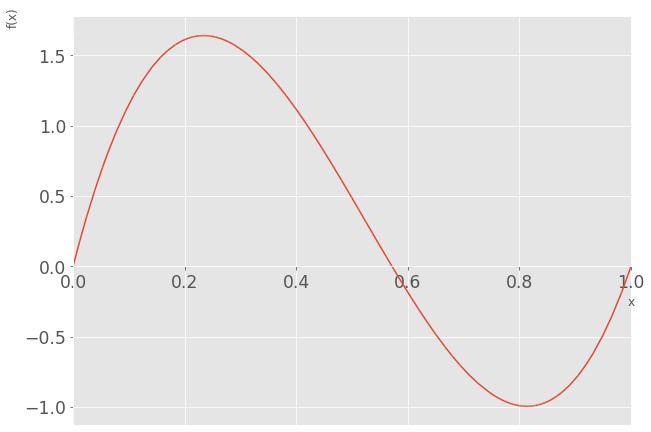

In [51]:
psi0_norm = sym.sqrt(735/1)*((x/1)**3-11/7*(x/1)**2+4/7*(x/1))
plot(psi0_norm, (x,0,1), show=True)

## Probability Distribution
We can also plot the probability distribution function $|\psi|^2$.

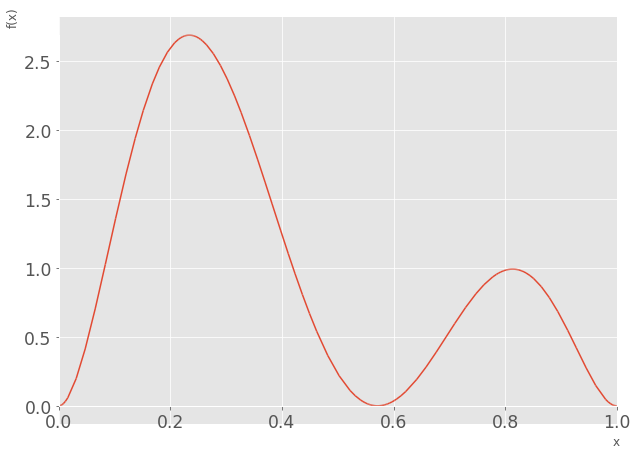

In [0]:
plot(psi0_norm**2, (x,0,1), show=True)

## Overlap Integrals
We can find the amplitude of each allowed wavefunction that contributes to making this particular superposition by calculating
\begin{equation} 
\begin{split}
c_n & = \left<E_n|\psi\right> 
\\
c_n & = \int_{-\infty}^{\infty}\phi_n^*~\psi\left(x, 0\right)~dx
\\
c_n & = \int_{0}^{L}\sqrt{\frac{2}{L}}\sin\left(\frac{n\pi x}{L}\right)\cdot\sqrt{\frac{735}{L}}\left[\left(\frac{x}{L}\right)^3-\frac{11}{7}\left(\frac{x}{L}\right)^2+\frac{4}{7}\left(\frac{x}{L}\right)\right]~dx
\end{split}
\end{equation}
We expect that the sum of the squares of all of these overlaps is equal to 1 since this would be the sum of probabilities of every possible eigenstate.

In [0]:
n = sym.symbols('n')
psi0_n = sym.sqrt(735/L)*((x/L)**3-11/7*(x/L)**2+4/7*(x/L))
phi_n = sym.sqrt(2/L)*sym.sin(n*sym.pi*x/L)
sym.integrate(phi_n*psi0_n, (x, 0, L))


        ⎛⎧         0            for n = 0⎞         ⎛⎧                         
        ⎜⎪                               ⎟         ⎜⎪                         
        ⎜⎪-3.14285714285714⋅L            ⎟         ⎜⎪0.428571428571429⋅L⋅sin(π
  7⋅√30⋅⎜⎨────────────────────  otherwise⎟   7⋅√30⋅⎜⎨─────────────────────────
        ⎜⎪        3  3                   ⎟         ⎜⎪            2  2         
        ⎜⎪       π ⋅n                    ⎟         ⎜⎪           π ⋅n          
        ⎝⎩                               ⎠         ⎝⎩                         
- ──────────────────────────────────────── + ─────────────────────────────────
                     L                                                        

            0                                       for n = 0⎞
                                                             ⎟
⋅n)   2.85714285714286⋅L⋅cos(π⋅n)   6.0⋅L⋅sin(π⋅n)           ⎟
─── + ─────────────────────────── - ──────────────  otherwise⎟
                  3  3              

That's difficult to determine what the result is. Let's break the integral into pieces. We'll leave out the normalization constants $\sqrt{2/L}$ and $\sqrt{735/L}$ and put them in at the end. We'll do the same with the $L$ values in the denominators of each term.

In [0]:
term1 = sym.sin(n*sym.pi*x/L)*x**3
term2 = sym.sin(n*sym.pi*x/L)*x**2
term3 = sym.sin(n*sym.pi*x/L)*x

sym.integrate(term1, (x, 0, L))

⎧                              0                                for n = 0
⎪                                                                        
⎪   4               4               4               4                    
⎨  L ⋅cos(π⋅n)   3⋅L ⋅sin(π⋅n)   6⋅L ⋅cos(π⋅n)   6⋅L ⋅sin(π⋅n)           
⎪- ─────────── + ───────────── + ───────────── - ─────────────  otherwise
⎪      π⋅n            2  2            3  3            4  4               
⎩                    π ⋅n            π ⋅n            π ⋅n                

This simplifies to only the first and third terms because $\sin$ is zero for $n\pi$.
\begin{equation}
\\
\frac{L^4\left(6-n^2 \pi^2\right)}{n^3 \pi^3}\left(-1\right)^n
\\
\end{equation}

where the $\left(-1\right)^n$ is due to $\cos\left(n\pi\right)=1$ when $n$ is even, and $\cos\left(n\pi\right)=-1$ when $n$ is odd.

In [0]:
sym.integrate(term2, (x, 0, L))

⎧                          0                            for n = 0
⎪                                                                
⎪   3               3               3                3           
⎨  L ⋅cos(π⋅n)   2⋅L ⋅sin(π⋅n)   2⋅L ⋅cos(π⋅n)    2⋅L            
⎪- ─────────── + ───────────── + ───────────── - ─────  otherwise
⎪      π⋅n            2  2            3  3        3  3           
⎩                    π ⋅n            π ⋅n        π ⋅n            

The same argument for $\sin$ at $n\pi$ gives
\begin{equation}
\frac{-2L^3}{n^3\pi^3}+\left(-\frac{n^2\pi^2 L^3}{n^3\pi^3}+\frac{2L^3}{n^3\pi^3}\right)\left(-1\right)^{n}
\end{equation}

In [0]:
sym.integrate(term3, (x, 0, L))

⎧             0               for n = 0
⎪                                      
⎪   2             2                    
⎨  L ⋅cos(π⋅n)   L ⋅sin(π⋅n)           
⎪- ─────────── + ───────────  otherwise
⎪      π⋅n           2  2              
⎩                   π ⋅n               

This last one simplifies to
$$\frac{n^2\pi^2L^2}{n^3\pi^3}\left(-1\right)^n$$

Let's put the coefficients back in.

### Term 1
\begin{equation}
\begin{split}
\\
& \frac{7\sqrt{30}}{L^4}\frac{L^4\left(6-n^2 \pi^2\right)}{n^3 \pi^3}\left(-1\right)^n
\\
& \frac{\left(42\sqrt{30}-7\sqrt{30}~n^2 \pi^2\right)}{n^3 \pi^3}\left(-1\right)^n
\end{split}
\end{equation}
### Term 2
\begin{equation}
\begin{split}
& \frac{7\sqrt{30}}{L^3}\left(\frac{-11}{7}\right)\left[\frac{-2L^3}{n^3\pi^3}+\left(-\frac{n^2\pi^2 L^3}{n^3\pi^3}+\frac{2L^3}{n^3\pi^3}\right)\left(-1\right)^{n}\right]
\\
& \frac{22\sqrt{30}}{n^3\pi^3}+\left(\frac{11\sqrt{30}~n^2\pi^2}{n^3\pi^3}-\frac{22\sqrt{30}}{n^3\pi^3}\right)\left(-1\right)^{n}
\end{split}
\end{equation}
### Term 3
\begin{equation}
\begin{split}
& -\frac{7\sqrt{30}}{L}\frac{4}{7L}\frac{n^2\pi^2L^2}{n^3\pi^3}\left(-1\right)^n
\\
& -\frac{28\sqrt{30}}{7}\frac{n^2\pi^2}{n^3\pi^3}\left(-1\right)^n
\end{split}
\end{equation}

The terms with $n^2 \pi^2$ in the numerator add to zero.
$$-7\sqrt{30}+11\sqrt{30}-4\sqrt{30}=0$$

Let's look at the other terms. When $n$ is even
\begin{equation}
\begin{split}
c_n & = \frac{\left(42+22-22\right)\sqrt{30}}{7}\frac{1}{n^3\pi^3}
\\
c_n & = \frac{42\sqrt{30}}{n^3\pi^3}
\end{split}
\end{equation}

When $n$ is odd
\begin{equation}
\begin{split}
c_n & = \frac{\left(-42+22+22\right)\sqrt{30}~n^2\pi^2}{n^3\pi^3}
\\
c_n & = \frac{2\sqrt{30}}{n^3\pi^3}
\end{split}
\end{equation}

We can define these functions and see what the amplitudes look like for the the infinite well wavefunctions that make up this superposition.

In [0]:
n_even = np.array([2, 4, 6, 8, 10])
n_odd = np.array([1, 3, 5, 7, 9, 11])
c_even = 42*np.sqrt(30)/(n_even*np.pi)**3
c_odd = 2*np.sqrt(30)/(n_odd*np.pi)**3
print(c_even, c_odd)

[0.92740688 0.11592586 0.0343484  0.01449073 0.00741926] [3.53297858e-01 1.30851059e-02 2.82638287e-03 1.03002291e-03
 4.84633551e-04 2.65437910e-04]


The more general formula for the amplitudes is
$$c_n = \frac{\left[22+20\left(-1\right)^n\right]\sqrt{30}}{\left(n\pi\right)^3}$$
We can calculate the amplitudes in order using the formula.

In [61]:
n_arr = np.arange(1,15,1)
c_n = (22+20*(-1)**(n_arr))*np.sqrt(30)/(n_arr*np.pi)**3
['{:.4f}'.format(i) for i in c_n]

['0.3533',
 '0.9274',
 '0.0131',
 '0.1159',
 '0.0028',
 '0.0343',
 '0.0010',
 '0.0145',
 '0.0005',
 '0.0074',
 '0.0003',
 '0.0043',
 '0.0002',
 '0.0027']

## Probability amplitudes
We can square these to get the probability of each wavefunction. We'll add the probabilities to see that they are approximately 1.

In [60]:
P=0
for i in range (1,15,1):
  P += ((22+20*(-1)**(i))*np.sqrt(30)/(i*np.pi)**3)**2

print(P)

0.9999928851879352


That shows that the probability is 100% to 5 significant digits after adding up the first 14 wavefunctions.

## Plotting the wavefunctions
Let's use the amplitudes $c_n$ to assign amplitudes to the first 14 wavefunctions.

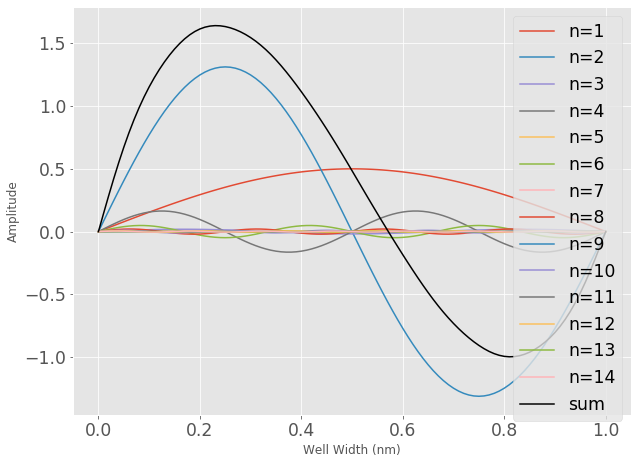

In [64]:
wellx = np.arange(0, 1.01, 0.01)
y = np.array(len(wellx))
ysum = np.zeros(len(wellx))
for i in range(len(c_n)):
  nlabel=str(i+1)
  y = c_n[i]*np.sqrt(2)*np.sin((i+1)*np.pi*wellx/1)
  ysum += y
  plt.plot(wellx, y, label='n='+nlabel)
plt.plot(wellx, ysum, '-k', label='sum')
plt.legend(loc='best')
plt.xlabel('Well Width (nm)')
plt.ylabel('Amplitude')
plt.show()

## Probability Distributions
We can also plot the probability distributions for each of the first 14 wavefunctions.

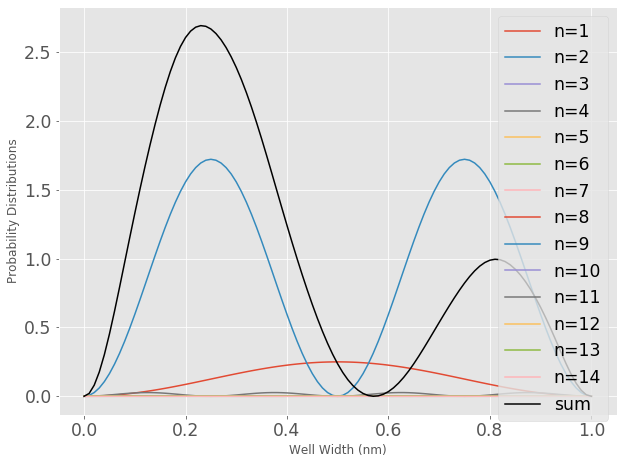

In [67]:
y2 = np.array(len(wellx))
y2tot = ysum**2
for i in range(len(c_n)):
  nlabel=str(i+1)
  y2 = c_n[i]**2*2*(np.sin((i+1)*np.pi*wellx/1))**2
  plt.plot(wellx, y2, label='n='+nlabel)
plt.plot(wellx, y2tot, '-k', label='sum')
plt.legend(loc='best')
plt.xlabel('Well Width (nm)')
plt.ylabel('Probability Distributions')
plt.show()